#  OpenClassroom & Towards Science 

1- Faire d'abord le tp d'openclassroom et s'arreter à la partie 
' Utilisation du VGG-16 pré-entraîné' 

2- Faire le tuto de towards data science 

3- continuer le tuto d'open classroom

## Parties 1 & 3 - OpenClassroom TP- Implémentez votre premier réseau de neurones avec Keras

OpenClassroom: https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras

## Partie 2 - Building a Convolutional Neural Network (CNN) in Keras

TowardsDataScience: https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

## 1- Solution de l'implémentation de VGG-16 (openclassroom)

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D

my_VGG16= Sequential()

#1st bloc
my_VGG16.add(Conv2D(64,(3,3),input_shape=(224,224,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(64,(3,3),padding='same',activation='relu'))

my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))





Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
#2nd Bloc
my_VGG16.add(Conv2D(128,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(128,(3,3),padding='same',activation='relu'))

my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#3rd bloc
my_VGG16.add(Conv2D(256,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(256,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(256,(3,3),padding='same',activation='relu'))

my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#4th bloc
my_VGG16.add(Conv2D(512,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(512,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(512,(3,3),padding='same',activation='relu'))

my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#5th bloc
my_VGG16.add(Conv2D(512,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(512,(3,3),padding='same',activation='relu'))

my_VGG16.add(Conv2D(512,(3,3),padding='same',activation='relu'))

my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))



In [3]:
from keras.layers import Flatten, Dense

# Conversion des matrices 3D en vecteur 1D
my_VGG16.add(Flatten())

my_VGG16.add(Dense(4096, activation='relu'))

my_VGG16.add(Dense(4096,activation='relu'))
my_VGG16.add(Dense(1000,activation='softmax'))

On va load notre dataset, lui faire les prétraitements necessaires, puis creer notre model vgg, le compiler et enfin l'entrainer et le tester.

Mais avant faire le tuto de Towards DataScience 

## 2- Towards Data Science 

### Loading the dataset

In [24]:
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test,y_test) = mnist.load_data()

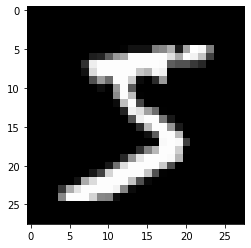

In [25]:
#let’s take a look at one of the images in our dataset

import matplotlib.pyplot as plt 

#plot the first image in the dataset 
plt.imshow(X_train[0],cmap='gray')

In [26]:
#check image shape
X_train[0].shape

(28, 28)

In [27]:
#check xtrain exemples
X_train.shape

(60000, 28, 28)

### Data pre-processing

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [28]:
#reshape data to fit model

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)


We need to ‘one-hot-encode’ our target variable. 

There are 10 classes ( 0 to 9) so our target will have 10 columns

In [29]:
from keras.utils import to_categorical

#one-hot encode target column
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

#see an exemple
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_train[0].shape

(10,)

### Building a small model to test before applying VGG16

this model takes the same input as the images of the daset 28x28 not like VGG-16
( i need to see if it is normal to reshape to 128x 128 for vgg-16 or i can do another thing)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten, Dense

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

### Compiling the model

In [12]:
#compile model 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model

Lien pour mieux comprendre les termes epochs ...ect
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/


In [0]:
#train the model
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 167s 3ms/step - loss: 2.1646 - acc: 0.8383 - val_loss: 0.0847 - val_acc: 0.9741
Epoch 2/3
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0702 - acc: 0.9792 - val_loss: 0.0914 - val_acc: 0.9737
Epoch 3/3
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0422 - acc: 0.9869 - val_loss: 0.0885 - val_acc: 0.9767


### make predictions

The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0–9).

To show this, we will show the predictions for the first 4 images in the test set.

In [0]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[2.8612938e-06, 3.0342020e-12, 2.9125427e-08, 2.2747287e-08,
        2.2083599e-10, 7.0136332e-09, 3.5075218e-14, 9.9999595e-01,
        1.0779497e-09, 1.1467720e-06],
       [5.8986753e-09, 8.2773511e-08, 9.9999976e-01, 3.1506091e-12,
        3.5673355e-13, 1.9024819e-12, 6.3658746e-08, 1.0743872e-15,
        4.3923696e-09, 8.7973472e-14],
       [1.8281975e-07, 9.9960583e-01, 2.2667465e-04, 1.5185622e-10,
        1.3266495e-05, 4.5351271e-07, 8.2485991e-07, 4.6749037e-07,
        1.5233376e-04, 2.4984505e-08],
       [9.9999976e-01, 3.3063157e-12, 3.6905856e-09, 2.7756084e-15,
        3.5918926e-10, 5.1442974e-09, 2.3101263e-07, 3.8744580e-12,
        1.5961875e-09, 1.7021989e-08]], dtype=float32)

### compare

In [30]:
#actual results for first 4 images in test set are the same as we predicted
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Utilisation du VGG-16 pré-entraîné ( suite de Openclassroom)

Dans cette partie, nous allons apprendre à classifier des images avec le modèle VGG-16 fourni par Keras et pré-entraîné sur ImageNet.

### Charger le modèle

Charger ce modèle avec la classe VGG16 de  keras.applications.vgg16

In [0]:
from keras.applications.vgg16 import VGG16

vgg16=VGG16()
#print(vgg16.summary())

553467904/553467096 [==============================] - 1526s 3us/step


Par défaut, le constructeur  VGG16()  crée le réseau VGG-16 pré-entraîné sur ImageNet. Si à l'avenir, pour d'autres projets, vous souhaitez initialiser aléatoirement les poids, il faudra préciser  weight=None  en argument.

Le constructeur possède d'autres paramètres pour faire du Transfer Learning, que nous allons utiliser dans la partie suivante.

### Prétraitemens et training

(voir explications sur le site d'OCR)

In [13]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

#charger l'image
img=load_img('C:\\Users\Fatah\Downloads\Stage\Pratique\chat.jpg',target_size=(224,224)) 

# Convertir en tableau numpy
img= img_to_array(img)

# Créer la collection d'images (un seul échantillon)
img=img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))

# Prétraiter l'image comme le veut VGG-16
img=preprocess_input(img)

### Prédiction

In [0]:
# Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y = vgg16.predict(img)  
y

array([[2.18879237e-07, 3.19112723e-06, 1.03933389e-05, 4.45714886e-06,
        8.32834485e-06, 7.70751114e-07, 7.31312895e-08, 1.53171477e-05,
        8.27017175e-06, 2.22088347e-05, 1.37284940e-06, 7.81323138e-07,
        1.73867954e-06, 1.09971745e-06, 5.58299121e-07, 1.55368946e-06,
        1.03659636e-06, 4.63099677e-05, 1.89865227e-06, 1.49072707e-06,
        1.61153139e-06, 1.31601564e-05, 9.85401584e-07, 4.97673045e-06,
        4.03967215e-06, 9.85214569e-07, 2.77224035e-06, 1.36000710e-06,
        4.64407231e-06, 1.86058278e-05, 3.03549484e-07, 7.43710132e-07,
        6.34962248e-07, 6.29382612e-07, 7.88674640e-07, 2.29430952e-07,
        6.30541172e-06, 7.91516811e-07, 7.95826636e-05, 1.17343075e-06,
        3.36580592e-06, 8.31603575e-06, 1.66191467e-06, 4.85602527e-07,
        4.93676052e-05, 5.32562308e-06, 1.07956812e-05, 9.95438995e-07,
        4.83699182e-07, 3.32998781e-07, 1.19684739e-06, 3.16932096e-06,
        6.27417239e-06, 8.76926720e-07, 7.22341520e-06, 6.334145

On obtient la sortie finale du réseau, c'est-à-dire une liste de 1000 probabilités.

### Décodage de la prédicition

Les classes correspondant à ces probabilités ne sont pas explicitement données. La fonction  decode_predictions  de  keras.applications.vgg16  permet alors de récupérer cette information.  Ainsi, on peut faire un top 3 des classes les plus probables de l'image

In [0]:
from keras.applications.vgg16 import decode_predictions

#afficher les 3 classes les plus probables
print('top 3 classes  are: ', decode_predictions(y, top=3)[0])

top 3 classes  are:  [('n02124075', 'Egyptian_cat', 0.8185691), ('n02441942', 'weasel', 0.05100181), ('n02123045', 'tabby', 0.024613801)]


## Transfer Learning

 Dans les trois cas, fine-tuning total, extraction des features, et fine-tuning partiel, il faut remplacer les dernières couches fully-connected qui permettent de classifier l'image dans une des 1000 classes ImageNet) par un classifieur plus adapté à notre problème.  Par exemple, supposons qu'on veuille différencier un chat d'un chien (classification binaire).
 
 La suppression des dernières couches se fait en ajoutant l'argument  include_top = False  lors de l'import du modèle pré-entraîné. Dans ce cas, il faut aussi préciser les dimensions des images en entrée (input_shape ) 

In [0]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
vgg16_2=VGG16(weights="imagenet", include_top=False, input_shape=(224, 224,3))

#récuperer la sortie de ce réseau
x=vgg16_2.output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions= Dense(10, activation='softmax')(x)

# Définir le nouveau modèle
new_model=Model(inputs=vgg16_2.input, output=predictions)

C:\Users\Fatah\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
print(new_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras.utils.vis_utils import plot_model

plot_model(new_model,to_file='new_model.png')

#Pourquoi ça ne marche pas??

### Stratégie #1 : fine-tuning total
Ici, on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables" :

In [0]:
for layer in vgg16_2.layers:
    layer.trainable=True

### Stratégie #2 : extraction de features
On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches 

In [0]:
for layer in vgg16_2.layers:
    layer.trainable=False

### Stratégie #3 : fine-tuning partiel
On entraîne le nouveau classifieur et les couches hautes :

In [0]:
for layer in vgg16_2.layers[:5]:
    layer.trainable=False
    

### Entraînement du réseau

In [0]:
#charger une image
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

#charger l'image
img2=load_img('C:\\Users\Fatah\Downloads\Stage\Pratique\chat.jpg',target_size=(224,224)) 

# Convertir en tableau numpy
img2= img_to_array(img2)

# Créer la collection d'images (un seul échantillon)
img2=img.reshape((1,img2.shape[0],img2.shape[1],img2.shape[2]))

# Prétraiter l'image comme le veut VGG-16
img2=preprocess_input(img2)

In [0]:
# Compiler le modèle 
new_model.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),metrics=['accuracy'])

# Entraîner sur les données d'entraînement (X_train, y_train)
#new_model.fit()
#faut tester et trouver un tuto pour apprendre ça

### suite